<a href="https://www.kaggle.com/kumarsrikant/spaceship-titanic-eda-pca-baseline-modeling?scriptVersionId=89371539" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
train.drop('PassengerId',axis=1,inplace=True)

In [7]:
len(train)

8693

In [8]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
len(train.dropna())

6606

In [10]:
(6606/8693)*100

75.99217761417232

### Deleting null values is not a good idea, we are lossing around 25% data.

In [11]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


<AxesSubplot:xlabel='Transported', ylabel='Age'>

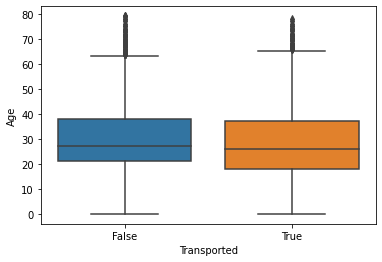

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='Transported',y='Age',data=train)

In [14]:
train['Age'].fillna(int(train['Age'].mode()),inplace=True)

<AxesSubplot:xlabel='Transported', ylabel='Age'>

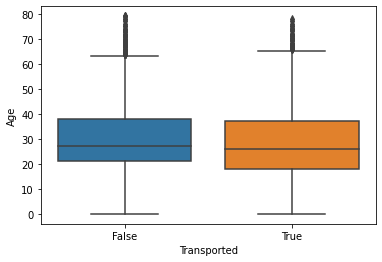

In [15]:
sns.boxplot(x='Transported',y='Age',data=train)

In [16]:
test['Age'].fillna(int(test['Age'].mode()),inplace=True)

### List of Numerical variables:
Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck

In [17]:
train[['RoomService']].isnull().sum()

RoomService    181
dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

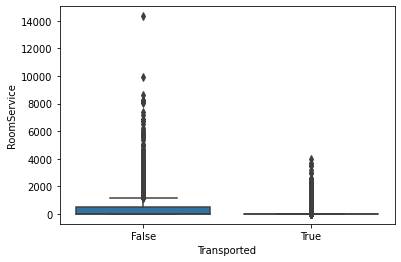

In [18]:
sns.boxplot(x='Transported',y='RoomService',data=train)

In [19]:
train['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [20]:

train['RoomService'].fillna(0,inplace=True)

In [21]:
test['RoomService'].describe()

count     4195.000000
mean       219.266269
std        607.011289
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      11567.000000
Name: RoomService, dtype: float64

In [22]:
test['RoomService'].fillna(0,inplace=True)

In [23]:
train['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [24]:
train['FoodCourt'].fillna(0,inplace=True)

In [25]:
train['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [26]:
train['ShoppingMall'].fillna(0,inplace=True)

In [27]:
train['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [28]:
train['Spa'].fillna(0,inplace=True)

In [29]:
train['VRDeck'].describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [30]:
train['VRDeck'].fillna(0,inplace=True)

In [31]:
test['ShoppingMall'].describe()

count    4179.000000
mean      177.295525
std       560.821123
min         0.000000
25%         0.000000
50%         0.000000
75%        33.000000
max      8292.000000
Name: ShoppingMall, dtype: float64

In [32]:
test['FoodCourt'].describe()

count     4171.000000
mean       439.484296
std       1527.663045
min          0.000000
25%          0.000000
50%          0.000000
75%         78.000000
max      25273.000000
Name: FoodCourt, dtype: float64

In [33]:
test['Spa'].describe()

count     4176.000000
mean       303.052443
std       1117.186015
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      19844.000000
Name: Spa, dtype: float64

In [34]:
test['VRDeck'].describe()

count     4197.000000
mean       310.710031
std       1246.994742
min          0.000000
25%          0.000000
50%          0.000000
75%         36.000000
max      22272.000000
Name: VRDeck, dtype: float64

In [35]:
test['VRDeck'].fillna(0,inplace=True)
test['Spa'].fillna(0,inplace=True)
test['FoodCourt'].fillna(0,inplace=True)
test['ShoppingMall'].fillna(0,inplace=True)

In [36]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [37]:
train['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [38]:
train.drop('Name',axis=1,inplace=True)

In [39]:
test.drop('Name',axis=1,inplace=True)

In [40]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [41]:
test['VIP'].describe()

count      4184
unique        2
top       False
freq       4110
Name: VIP, dtype: object

In [42]:
train['VIP'].describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

In [43]:
train['VIP'].value_counts().index[0]

False

In [44]:
most_freq_train = train['VIP'].value_counts().index[0]
most_freq_test = test['VIP'].value_counts().index[0]
train['VIP'].fillna(most_freq_train,inplace=True)
test['VIP'].fillna(most_freq_test,inplace=True)

In [45]:
train['HomePlanet'].fillna('None', inplace=True)
train['CryoSleep'].fillna(False, inplace=True)
train['Cabin'].fillna('A/-1/A', inplace=True)
train['Destination'].fillna('None', inplace=True)

In [46]:
test['HomePlanet'].fillna('None', inplace=True)
test['CryoSleep'].fillna(False, inplace=True)
test['Cabin'].fillna('A/-1/A', inplace=True)
test['Destination'].fillna('None', inplace=True)

In [47]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [48]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [49]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


### Feature Scaling

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 636.8+ KB


In [51]:
from sklearn.preprocessing import MinMaxScaler
transformer_Age = MinMaxScaler().fit(train[['Age']])
val=transformer_Age.transform(train[['Age']])
train['Age']=val

In [52]:
transformer_RoomService = MinMaxScaler().fit(train[['RoomService']])
val=transformer_RoomService.transform(train[['RoomService']])
train['RoomService']=val

In [53]:
transformer_FoodCourt = MinMaxScaler().fit(train[['FoodCourt']])
val=transformer_FoodCourt.transform(train[['FoodCourt']])
train['FoodCourt']=val

In [54]:
transformer_ShoppingMall = MinMaxScaler().fit(train[['ShoppingMall']])
val=transformer_ShoppingMall.transform(train[['ShoppingMall']])
train['ShoppingMall']=val

In [55]:
transformer_Spa = MinMaxScaler().fit(train[['Spa']])
val=transformer_Spa.transform(train[['Spa']])
train['Spa']=val

In [56]:
transformer_VRDeck = MinMaxScaler().fit(train[['VRDeck']])
val=transformer_VRDeck.transform(train[['VRDeck']])
train['VRDeck']=val

In [57]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True
2,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False
4,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False
8689,Earth,True,G/1499/S,PSO J318.5-22,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True
8691,Europa,False,E/608/S,55 Cancri e,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False


In [58]:
transformer_VRDeck = MinMaxScaler().fit(test[['VRDeck']])
val=transformer_VRDeck.transform(test[['VRDeck']])
test['VRDeck']=val

transformer_Spa = MinMaxScaler().fit(test[['Spa']])
val=transformer_Spa.transform(test[['Spa']])
test['Spa']=val

transformer_ShoppingMall = MinMaxScaler().fit(test[['ShoppingMall']])
val=transformer_ShoppingMall.transform(test[['ShoppingMall']])
test['ShoppingMall']=val


transformer_FoodCourt = MinMaxScaler().fit(test[['FoodCourt']])
val=transformer_FoodCourt.transform(test[['FoodCourt']])
test['FoodCourt']=val

transformer_RoomService = MinMaxScaler().fit(test[['RoomService']])
val=transformer_RoomService.transform(test[['RoomService']])
test['RoomService']=val

from sklearn.preprocessing import MinMaxScaler
transformer_Age = MinMaxScaler().fit(test[['Age']])
val=transformer_Age.transform(test[['Age']])
test['Age']=val


train

In [59]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
None              182
Name: Destination, dtype: int64

In [60]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True
2,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False
4,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False
8689,Earth,True,G/1499/S,PSO J318.5-22,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True
8691,Europa,False,E/608/S,55 Cancri e,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False


In [61]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
None       201
Name: HomePlanet, dtype: int64

In [62]:
train['CryoSleep'].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [63]:
train['Cabin'].value_counts()

A/-1/A     199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64

In [64]:
def extract_deck(s):
    return s.split('/')[0]

def extract_num(s):
    return s.split('/')[1]

def extract_side(s):
    return s.split('/')[2]

train['Deck'] = train['Cabin'].apply(extract_deck)
train['Num'] = train['Cabin'].apply(extract_num)
train['Side'] = train['Cabin'].apply(extract_side)

test['Deck'] = test['Cabin'].apply(extract_deck)
test['Num'] = test['Cabin'].apply(extract_num)
test['Side'] = test['Cabin'].apply(extract_side)

In [65]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [66]:
train['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     455
T       5
Name: Deck, dtype: int64

In [67]:
train['Num'].value_counts()

-1      199
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: Num, Length: 1818, dtype: int64

In [68]:
train['Num']=train['Num'].astype('int')

In [69]:
train['Num'].describe()

count    8693.000000
mean      586.601173
std       513.906241
min        -1.000000
25%       152.000000
50%       407.000000
75%       983.000000
max      1894.000000
Name: Num, dtype: float64

In [70]:
transformer_Num = MinMaxScaler().fit(train[['Num']])
val=transformer_Num.transform(train[['Num']])
train['Num']=val

transformer_Num = MinMaxScaler().fit(test[['Num']])
val=transformer_Num.transform(test[['Num']])
test['Num']=val

In [71]:
test['Num']=test['Num'].astype('int')

<AxesSubplot:xlabel='Transported', ylabel='Num'>

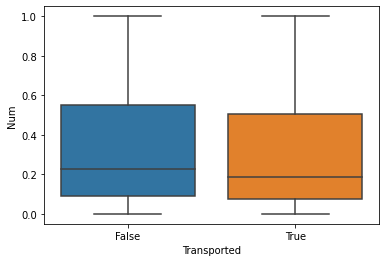

In [72]:
sns.boxplot(x='Transported',y='Num',data=train)

In [73]:
train['Side'].value_counts()

S    4288
P    4206
A     199
Name: Side, dtype: int64

In [74]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
None              182
Name: Destination, dtype: int64

In [75]:
train['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [76]:
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,G,0,S
1,0018_01,Earth,False,TRAPPIST-1e,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,F,0,S
2,0019_01,Europa,True,55 Cancri e,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,C,0,S
4,0023_01,Earth,False,TRAPPIST-1e,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,F,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,0.430380,False,0.000000,0.000000,0.00000,0.000000,0.000000,G,0,S
4273,9269_01,Earth,False,TRAPPIST-1e,0.531646,False,0.000000,0.033514,0.00205,0.000504,0.006466,A,0,A
4274,9271_01,Mars,True,55 Cancri e,0.227848,False,0.000000,0.000000,0.00000,0.000000,0.000000,D,0,P
4275,9273_01,Europa,False,None,0.227848,False,0.000000,0.106042,0.00000,0.000000,0.023482,D,0,P


In [77]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,B,0.000528,P
1,Earth,False,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True,F,0.000528,S
2,Europa,False,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False,A,0.000528,S
3,Europa,False,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False,A,0.000528,S
4,Earth,False,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True,F,0.001055,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False,A,0.052243,P
8689,Earth,True,PSO J318.5-22,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,G,0.791557,S
8690,Earth,False,TRAPPIST-1e,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True,G,0.792084,S
8691,Europa,False,55 Cancri e,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False,E,0.321372,S


In [78]:
#cols=['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck','Num', 'Side']
cols=[ 'Deck','Side']

In [79]:
train1=train.copy()

In [80]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [81]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,B,0.000528,P
1,Earth,False,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True,F,0.000528,S
2,Europa,False,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False,A,0.000528,S
3,Europa,False,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False,A,0.000528,S
4,Earth,False,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True,F,0.001055,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False,A,0.052243,P
8689,Earth,True,PSO J318.5-22,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,G,0.791557,S
8690,Earth,False,TRAPPIST-1e,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True,G,0.792084,S
8691,Europa,False,55 Cancri e,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False,E,0.321372,S


In [82]:
train['Destination'] = train['Destination'].map({'55 Cancri e': 0, 'PSO J318.5-22': 1,
                                                   'TRAPPIST-1e': 2, 'None': 3})

In [83]:
train['HomePlanet'] = train['HomePlanet'].map({'Earth': 0, 'Europa': 1,
                                                 'Mars': 2, 'None': 3})

In [84]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,False,2,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,B,0.000528,P
1,0,False,2,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True,F,0.000528,S
2,1,False,2,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False,A,0.000528,S
3,1,False,2,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False,A,0.000528,S
4,0,False,2,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True,F,0.001055,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False,A,0.052243,P
8689,0,True,1,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,G,0.791557,S
8690,0,False,2,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True,G,0.792084,S
8691,1,False,0,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False,E,0.321372,S


In [85]:
train.Deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     455
T       5
Name: Deck, dtype: int64

In [86]:
train.Side.value_counts()

S    4288
P    4206
A     199
Name: Side, dtype: int64

In [87]:
train['Deck'] = train['Deck'].map({'F': 0, 'G': 1,'E': 2, 'B': 3,'C': 4, 'D': 5,'A': 6, 'T': 7})
train['Side'] = train['Side'].map({'S': 0, 'P': 1,'A': 2})

In [88]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,False,2,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,3,0.000528,1
1,0,False,2,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True,0,0.000528,0
2,1,False,2,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False,6,0.000528,0
3,1,False,2,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False,6,0.000528,0
4,0,False,2,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True,0,0.001055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False,6,0.052243,1
8689,0,True,1,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,0.791557,0
8690,0,False,2,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True,1,0.792084,0
8691,1,False,0,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False,2,0.321372,0


In [89]:
test.drop('PassengerId',axis=1,inplace=True)
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,Earth,True,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,G,0,S
1,Earth,False,TRAPPIST-1e,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,F,0,S
2,Europa,True,55 Cancri e,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,C,0,S
3,Europa,False,TRAPPIST-1e,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,C,0,S
4,Earth,False,TRAPPIST-1e,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,F,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,0.430380,False,0.000000,0.000000,0.00000,0.000000,0.000000,G,0,S
4273,Earth,False,TRAPPIST-1e,0.531646,False,0.000000,0.033514,0.00205,0.000504,0.006466,A,0,A
4274,Mars,True,55 Cancri e,0.227848,False,0.000000,0.000000,0.00000,0.000000,0.000000,D,0,P
4275,Europa,False,None,0.227848,False,0.000000,0.106042,0.00000,0.000000,0.023482,D,0,P


In [90]:
test['Deck'] = test['Deck'].map({'F': 0, 'G': 1,'E': 2, 'B': 3,'C': 4, 'D': 5,'A': 6, 'T': 7})
test['Side'] = test['Side'].map({'S': 0, 'P': 1,'A': 2})

In [91]:
test['HomePlanet'] = test['HomePlanet'].map({'Earth': 0, 'Europa': 1,
                                                 'Mars': 2, 'None': 3})

In [92]:
test['Destination'] = test['Destination'].map({'55 Cancri e': 0, 'PSO J318.5-22': 1,
                                                   'TRAPPIST-1e': 2, 'None': 3})

In [93]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,True,2,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0
1,0,False,2,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,0,0,0
2,1,True,0,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,4,0,0
3,1,False,2,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,4,0,0
4,0,False,2,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,0.430380,False,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0
4273,0,False,2,0.531646,False,0.000000,0.033514,0.00205,0.000504,0.006466,6,0,2
4274,2,True,0,0.227848,False,0.000000,0.000000,0.00000,0.000000,0.000000,5,0,1
4275,1,False,3,0.227848,False,0.000000,0.106042,0.00000,0.000000,0.023482,5,0,1


In [94]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,False,2,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,3,0.000528,1
1,0,False,2,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True,0,0.000528,0
2,1,False,2,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False,6,0.000528,0
3,1,False,2,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False,6,0.000528,0
4,0,False,2,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True,0,0.001055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,False,6,0.052243,1
8689,0,True,1,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,0.791557,0
8690,0,False,2,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,True,1,0.792084,0
8691,1,False,0,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,False,2,0.321372,0


In [95]:
train.loc[train['Transported']==False,'Transported']=0
train.loc[train['Transported']==True,'Transported']=1

In [96]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,False,2,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,0,3,0.000528,1
1,0,False,2,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,1,0,0.000528,0
2,1,False,2,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,0,6,0.000528,0
3,1,False,2,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,0,6,0.000528,0
4,0,False,2,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,1,0,0.001055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0.518987,True,0.000000,0.228726,0.000000,0.073322,0.003066,0,6,0.052243,1
8689,0,True,1,0.227848,False,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0.791557,0
8690,0,False,2,0.329114,False,0.000000,0.000000,0.079687,0.000045,0.000000,1,1,0.792084,0
8691,1,False,0,0.405063,False,0.000000,0.035186,0.000000,0.015753,0.134049,0,2,0.321372,0


In [97]:
y=train['Transported']
train.drop('Transported',axis=1,inplace=True)

In [98]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [99]:
y=y.astype('int')

In [100]:
train.loc[train['CryoSleep']==False,'CryoSleep']=0
train.loc[train['CryoSleep']==True,'CryoSleep']=1
train.loc[train['VIP']==False,'VIP']=0
train.loc[train['VIP']==True,'VIP']=1

test.loc[test['CryoSleep']==False,'CryoSleep']=0
test.loc[test['CryoSleep']==True,'CryoSleep']=1
test.loc[test['VIP']==False,'VIP']=0
test.loc[test['VIP']==True,'VIP']=1

In [101]:
train['CryoSleep']=train['CryoSleep'].astype('int')
train['VIP']=train['VIP'].astype('int')
test['VIP']=test['VIP'].astype('int')
test['CryoSleep']=test['CryoSleep'].astype('int')

In [102]:

train.drop('Deck',axis=1,inplace=True)
test.drop('Deck',axis=1,inplace=True)

In [103]:
x_train,x_test,y_train,y_test = train_test_split(train,y, test_size=0.2, random_state=2)

In [104]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side
0,1,0,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000528,1
1,0,0,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000528,0
2,1,0,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,0.000528,0
3,1,0,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,0.000528,0
4,0,0,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,0.001055,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0.518987,1,0.000000,0.228726,0.000000,0.073322,0.003066,0.052243,1
8689,0,1,1,0.227848,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.791557,0
8690,0,0,2,0.329114,0,0.000000,0.000000,0.079687,0.000045,0.000000,0.792084,0
8691,1,0,0,0.405063,0,0.000000,0.035186,0.000000,0.015753,0.134049,0.321372,0


In [105]:
y_train

1475    0
7487    1
1800    1
7824    0
955     0
       ..
1099    0
2514    1
6637    0
2575    1
7336    0
Name: Transported, Length: 6954, dtype: int64

In [106]:
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [107]:
# logistic regression

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, rf_pred))



              precision    recall  f1-score   support

           0       0.76      0.82      0.79       828
           1       0.82      0.77      0.80       911

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [108]:
rf.feature_importances_

array([0.05522306, 0.09925526, 0.02793024, 0.1356758 , 0.00227227,
       0.10044686, 0.08572941, 0.07188885, 0.10276963, 0.10096798,
       0.19529136, 0.02254927])

In [109]:
rf_feature_imp=pd.DataFrame()
rf_feature_imp['Columns']=x_train.columns
rf_feature_imp['Importance']=rf.feature_importances_

In [110]:
rf_feature_imp

,Columns,Importance
0,HomePlanet,0.055223
1,CryoSleep,0.099255
2,Destination,0.027930
3,Age,0.135676
4,VIP,0.002272
5,RoomService,0.100447
6,FoodCourt,0.085729
7,ShoppingMall,0.071889
8,Spa,0.102770
9,VRDeck,0.100968


In [111]:
rf_feature_imp.sort_values('Importance',ascending=False)

,Columns,Importance
10,Num,0.195291
3,Age,0.135676
8,Spa,0.102770
9,VRDeck,0.100968
5,RoomService,0.100447
1,CryoSleep,0.099255
6,FoodCourt,0.085729
7,ShoppingMall,0.071889
0,HomePlanet,0.055223
2,Destination,0.027930


In [112]:
submit=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submit['Transported']=rf.predict(test)
submit.loc[submit['Transported']==0,'Transported']=False
submit.loc[submit['Transported']==1,'Transported']=True

submit.to_csv('submissionrf.csv', index=False)

In [113]:
import xgboost as xgb

In [114]:
params = {'learning_rate': 0.15,
          'min_child_weight': 0.65,
          'gamma': 0.1,
          'subsample': 0.75,
          'colsample_bytree': 0.85,
          'colsample_bylevel': 0.65,
          'max_depth': 4,
          'n_estimators': 100,
          'reg_lambda': 2.25,
          'monotone_constraints': '(0, -1)',
          'eval_metric': 'logloss',
          'use_label_encoder': False
          }

In [115]:
model = xgb.XGBClassifier()
model.set_params(**params)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.65,
              colsample_bynode=1, colsample_bytree=0.85,
              enable_categorical=False, eval_metric='logloss', gamma=0.1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=0.65, missing=nan,
              monotone_constraints='(0, -1)', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=2.25, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [116]:
xgb_pred = model.predict(x_test)
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       828
           1       0.80      0.83      0.82       911

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [117]:
submit=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submit['Transported']=model.predict(test)
submit.loc[submit['Transported']==0,'Transported']=False
submit.loc[submit['Transported']==1,'Transported']=True

submit.to_csv('submission_xgb.csv', index=False)